## 6 solution
- Fix high bias:
  - Try getting additional features => fix underfitting (high bias)
  - Try adding polynomial features $(x^2_1, x^2_2, x_1x_2,etc)$ => fix underfitting (high bias)
  - Try decreasing $λ$ => fix underfitting (high bias)
- Fix high variance:
  - Get more training examples => fix overfitting (high variance)
  - Try smaller sets of features => fix overfitting (high variance)
  - Try increasing $λ$ => fix overfitting (high variance)

## Evaluation

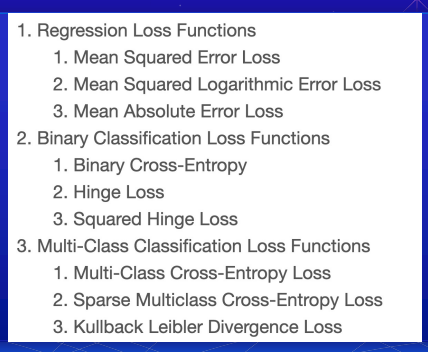

## Code

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/week 1/Medical_data.csv')

df.head()

,Number of times pregnant,Plasma glucose concentration test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Class variable (0 or 1)"]), df["Class variable (0 or 1)"], test_size=0.2, random_state=42)

In [7]:
SC = StandardScaler()

X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [11]:
NN = Sequential()

# layer hidden 5 unit, layer input 8 unit
NN.add(Dense(units=5, activation='relu', input_dim=8))
# layer hidden 5 unit
NN.add(Dense(units=5, activation='relu'))
# layer output 1 unit
NN.add(Dense(units=1, activation='sigmoid'))

In [12]:
NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
NN.fit(X_train, y_train, batch_size=20, epochs=100, verbose=0)  # batch each 20 example to train, epochs train 100 times

### Save model

In [15]:
model_json = NN.to_json()
with open('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/Supervised Learning/Neural Network/modelNN.json','w') as json_file:
  json_file.write(model_json)

In [16]:
#save weight into file
NN.save_weights('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/Supervised Learning/Neural Network/modelNN.h5')

In [17]:
#read model from file
json_read_file = open('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/Supervised Learning/Neural Network/modelNN.json','r')
load_model_json = json_read_file.read()
json_read_file.close()

model_from_file = model_from_json(load_model_json)

In [18]:
#read weight from file
model_from_file.load_weights('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/Supervised Learning/Neural Network/modelNN.h5')

In [23]:
model_from_file.compile(loss='binary_crossentropy', metrics=['accuracy'])

score = model_from_file.evaluate(X_train, y_train)

20/20 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.7964


In [26]:
y_pred = NN.predict(X_test)

y_pred = (y_pred > 0.5)

5/5 [==============================] - 0s 3ms/step


In [27]:
print(confusion_matrix(y_test, y_pred))

[[78 21]
 [19 36]]


### Example: Linear Regression

In [171]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

X_norm = StandardScaler().fit_transform(X)

n_train = 800

X_train, X_test = X_norm[:n_train, :], X_norm[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

In [172]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 20) (200, 20) (800,) (200,)


In [173]:
from keras.optimizers import SGD, Adam

In [174]:
model = Sequential()

model.add(Dense(units=1, input_dim=20, activation='linear'))

In [175]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 1)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [176]:
model.compile(SGD(learning_rate=0.04, momentum=0.9), 'mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=35, batch_size=100)

In [178]:
model.evaluate(X_train, y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.0105


0.010462113656103611

In [179]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [182]:
print(mean_squared_error(y_test, y_pred))

0.01018538846767789
